In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data
data = pd.read_csv('Organized_Data_FH.csv')

In [3]:
# Drop the 'Datetime' column as it's not needed for the prediction
data = data.drop(columns=['Datetime'])

# Handle missing values by filling them with the mean of each column
# data = data.fillna(data.mean())
# Handle missing values by dropping them
data = data.dropna().reset_index(drop=True)

In [5]:
# Separate features and target variable
# X = data.drop(columns=['nb_persons_SH'])
# y = data['nb_persons_SH']
X = data

In [6]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# Reshape the data for 1D CNN (samples, timesteps, features)
# Here, we assume each sample is a single timestep with multiple features
X = X.reshape((X.shape[0], X.shape[1], 1))


# y= to_categorical(y, num_classes=int(y.max() + 1))

# Try with Newmodel from WH
(less accuracy on WH)

In [12]:
# Load the model from the HDF5 file
loaded_model = tf.keras.models.load_model('1DCNN_Newmodel.keras')

In [13]:
loaded_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [11]:
# # Evaluate the loaded model to ensure it's working correctly
# loaded_loss, loaded_accuracy = loaded_model.evaluate(X, y)
# print(f'Loaded model validation accuracy: {loaded_accuracy:.4f}')

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9587 - loss: 0.3709      
Loaded model validation accuracy: 0.9505


In [14]:
y_pred = loaded_model.predict(X)

549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [15]:
y_pred_cat = np.argmax(y_pred, axis=1)
print(y_pred_cat)

[1 4 0 ... 0 0 0]


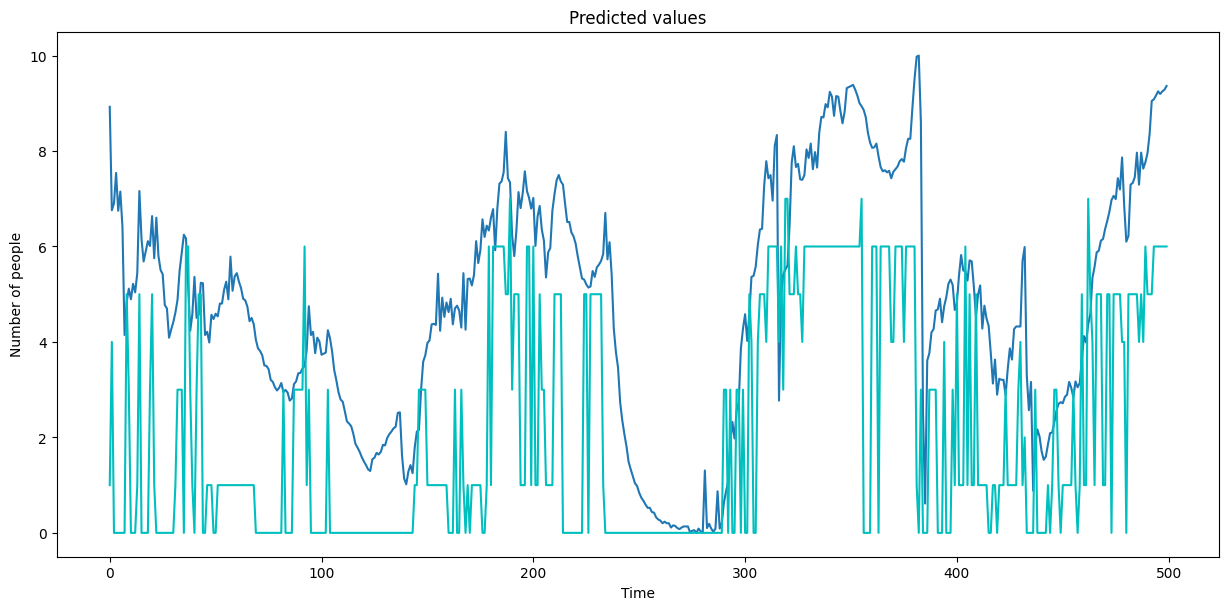

In [26]:
plt.close()

data_500 = data.head(500)
values = np.array(data_500['Testo 1 160 IAQ ppm'])
min_val = np.min(values)
max_val = np.max(values)

normalized_values = 10 * (values - min_val) / (max_val - min_val)


#plot 1:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
sns.lineplot(normalized_values)

sns.lineplot(y_pred_cat[:500],color='c')
plt.title('Predicted values')
plt.xlabel('Time')
plt.ylabel('Number of people')

plt.show()

In [21]:
loaded_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_25 (Conv1D)              │ (None, 12, 12)         │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12)         │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 6, 12)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 12)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_26 (Conv1D)              │ (None, 6, 64)          │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_27 (Conv1D)              │ (None, 3, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_27 (MaxPooling1D) │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,867 (179.17 KB)

 Trainable params: 45,459 (177.57 KB)

 Non-trainable params: 408 (1.59 KB)

# Try with Odlmodel from WH
(more accuracy on WH data)

In [31]:
# Load the model from the HDF5 file
loaded_model_odl = tf.keras.models.load_model('1DCNN_Odlmodel.keras')

In [32]:
loaded_model_odl.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [33]:
y_pred_odl = loaded_model_odl.predict(X)

549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [34]:
y_pred_cat_odl = np.argmax(y_pred_odl, axis=1)
print(y_pred_cat_odl)

[0 0 1 ... 0 0 0]


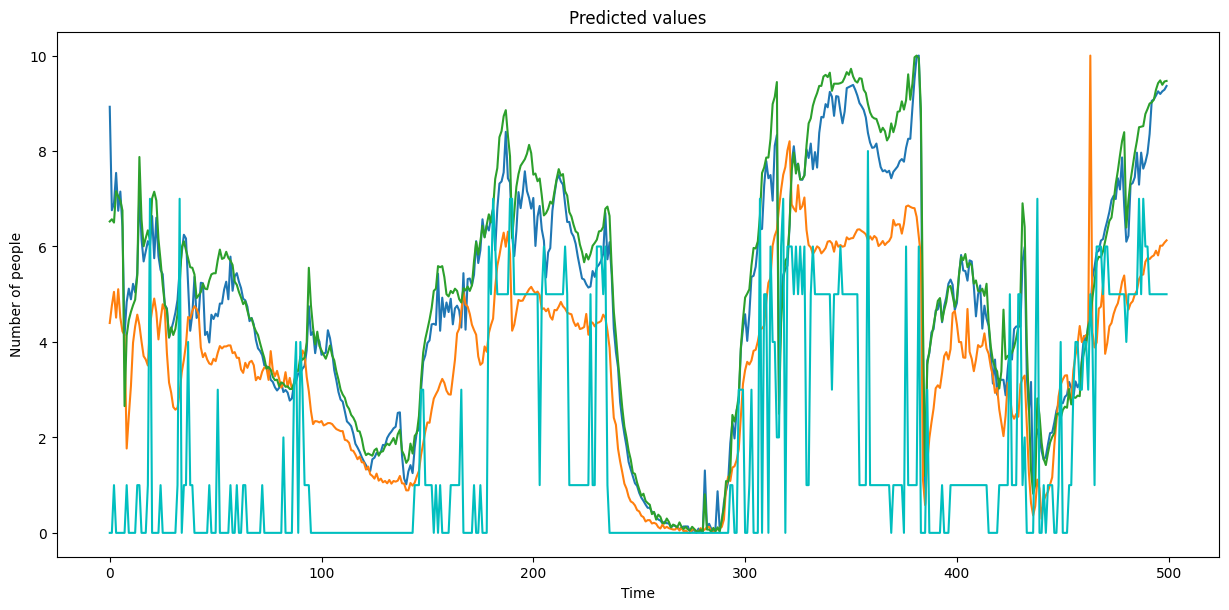

In [36]:
plt.close()

data_500 = data.head(500)
values1 = np.array(data_500['Testo 1 160 IAQ ppm'])
values2 = np.array(data_500['Testo 2 160 IAQ ppm'])
values3 = np.array(data_500['Testo 3 160 IAQ ppm'])

def normalize(values):
    min_val = np.min(values)
    max_val = np.max(values)
    normalized_values = 10 * (values - min_val) / (max_val - min_val)
    return normalized_values


#plot 1:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
sns.lineplot(normalize(values1))
sns.lineplot(normalize(values2))
sns.lineplot(normalize(values3))

sns.lineplot(y_pred_cat_odl[:500],color='c')
plt.title('Predicted values')
plt.xlabel('Time')
plt.ylabel('Number of people')

plt.show()